# 20240530 筆記

## 作業

請使用 YOLO 根據 kaggle 上面的 traffic sign detection 資料集，建立一個自己的 model。

https://www.kaggle.com/datasets/pkdarabi/cardetection

## 從 image 裡面取得 foreground object

In [8]:
import cv2
import numpy as np
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [5]:
image = cv2.imread('metal100.jpg')

In [7]:
px.imshow(image[:,:,::-1])

In [9]:
# 建立 mask
mask = np.zeros(image.shape[:2], np.uint8)

# 定義模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 繪製矩形，包含前景對象
rect = (60, 10, 440, 350)

# 應用GrabCut算法
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 生成前景掩碼
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image * mask2[:, :, np.newaxis]

In [10]:
px.imshow(foreground[:,:,::-1])

In [11]:
import gradio as gr

In [12]:
def process(image, xmin, ymin, xmax, ymax):
    # 建立 mask
    mask = np.zeros(image.shape[:2], np.uint8)
    
    # 定義模型
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    
    # 繪製矩形，包含前景對象
    rect = (xmin, ymin, xmax, ymax)
    
    # 應用GrabCut算法
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    
    # 生成前景掩碼
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    foreground = image * mask2[:, :, np.newaxis]
    return foreground

In [13]:
gr.Interface(process,
             ["image", "number", "number", "number", "number"],
             "image").launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


## 使用 YOLOv8 的 Instance Segmentation

In [14]:
from ultralytics import YOLO

In [15]:
model = YOLO("yolov8n-seg.pt")

100%|█████████████████████████████████| 6.73M/6.73M [00:01<00:00, 7.01MB/s]


In [16]:
results = model('therock.jpg')


image 1/1 C:\Users\Victor\vcdemy\20240530\therock.jpg: 480x640 1 person, 1 tie, 1 chair, 686.0ms
Speed: 12.5ms preprocess, 686.0ms inference, 2036.8ms postprocess per image at shape (1, 3, 480, 640)


In [17]:
results[0].show()

## Instance Segmentation 只畫出 polygon 的形狀。


0: 480x640 1 person, 1 tie, 279.4ms
Speed: 14.5ms preprocess, 279.4ms inference, 8.5ms postprocess per image at shape (1, 3, 480, 640)


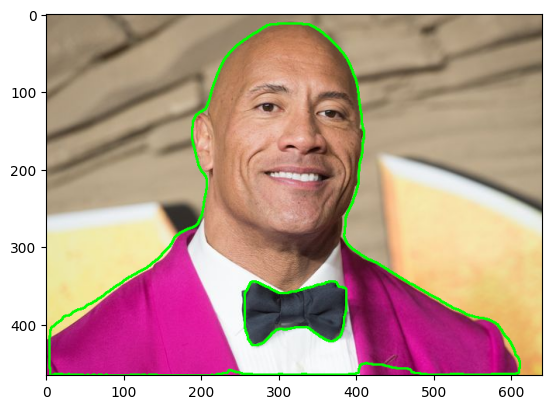

In [37]:
image = cv2.imread('therock.jpg')
image = image[:,:,::-1]
results = model(image)
image = image.astype(np.int32)
for result in results:
    for seg in result.masks.xy:  # 獲取分割多邊形
        # 轉換為整數類型座標
        points = np.array(seg, dtype=np.int32)
        # 繪製多邊形
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image)


0: 480x640 1 person, 1 tie, 1 chair, 240.4ms
Speed: 12.5ms preprocess, 240.4ms inference, 10.5ms postprocess per image at shape (1, 3, 480, 640)


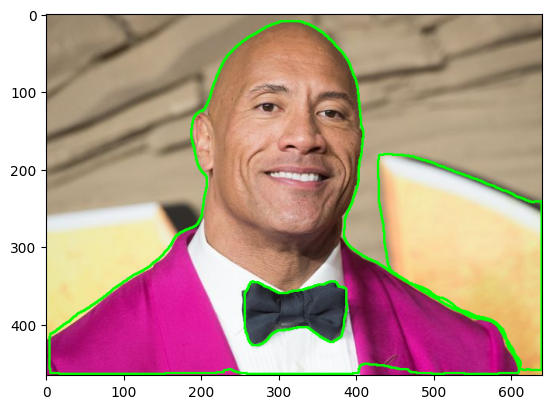

In [42]:
image = cv2.imread('therock.jpg')
results = model(image)
# image = image.astype(np.int32)
for result in results:
    for seg in result.masks.xy:  # 獲取分割多邊形
        # 轉換為整數類型座標
        points = np.array(seg, dtype=np.int32)
        # 繪製多邊形
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image[:,:,::-1])

In [48]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([27.,  0., 56.])
conf: tensor([0.9355, 0.8956, 0.2968])
data: tensor([[2.5242e+02, 3.4412e+02, 3.8907e+02, 4.2875e+02, 9.3555e-01, 2.7000e+01],
        [8.6670e-01, 5.8953e+00, 6.1786e+02, 4.6459e+02, 8.9562e-01, 0.0000e+00],
        [4.2681e+02, 1.7738e+02, 6.3929e+02, 4.5887e+02, 2.9677e-01, 5.6000e+01]])
id: None
is_track: False
orig_shape: (466, 640)
shape: torch.Size([3, 6])
xywh: tensor([[320.7437, 386.4384, 136.6449,  84.6313],
        [309.3615, 235.2449, 616.9895, 458.6992],
        [533.0496, 318.1231, 212.4879, 281.4846]])
xywhn: tensor([[0.5012, 0.8293, 0.2135, 0.1816],
        [0.4834, 0.5048, 0.9640, 0.9843],
        [0.8329, 0.6827, 0.3320, 0.6040]])
xyxy: tensor([[252.4212, 344.1227, 389.0662, 428.7540],
        [  0.8667,   5.8953, 617.8562, 464.5945],
        [426.8056, 177.3808, 639.2935, 458.8654]])
xyxyn: tensor([[0.3944, 0.7385, 0.6079, 0.9201],
        [0.0014, 0.0127, 0.9654, 0.9970],
        


0: 480x640 1 person, 1 tie, 1 chair, 386.5ms
Speed: 5.6ms preprocess, 386.5ms inference, 25.1ms postprocess per image at shape (1, 3, 480, 640)


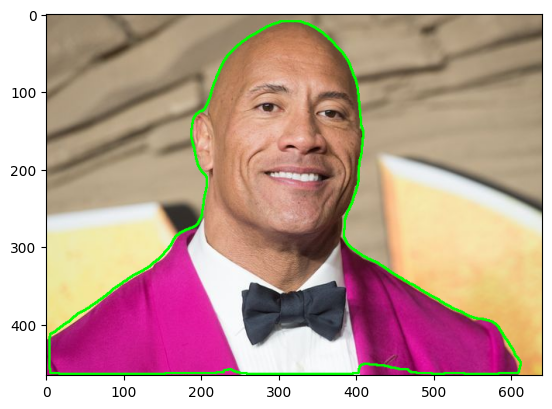

In [51]:
image = cv2.imread('therock.jpg')
results = model(image)
# image = image.astype(np.int32)
seg = results[0].masks.xy[1]  # 獲取分割多邊形
# 轉換為整數類型座標
points = np.array(seg, dtype=np.int32)
# 繪製多邊形
cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image[:,:,::-1])